In [1]:
from IPython.display import Audio
import librosa
from librosa import display
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
from PIL import Image
from matplotlib.pyplot import imshow

%matplotlib inline

In [2]:
y, sr = librosa.load('wav_files/20000_Rock_music.wav', sr = 22050) # Use the default sampling rate of 22,050 Hz

In [3]:
Audio(y, rate=sr)

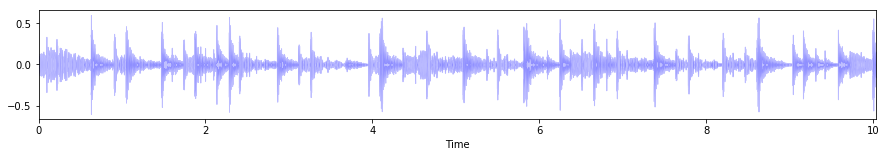

In [4]:
plt.figure(figsize=(15,2))
librosa.display.waveplot(y  = y,
                     sr     = sr, 
                     max_sr = 1000, 
                     alpha  = 0.25, 
                     color  = 'blue')

### Apply Pre-emphasis Filter
A pre-emphasis filter is useful in several ways: <br>(1) balance the frequency spectrum since high frequencies usually have smaller magnitudes compared to lower frequencies, <br>(2) avoid numerical problems during the Fourier transform operation and <br>(3) may also improve the Signal-to-Noise Ratio (SNR).<br>
Source: http://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

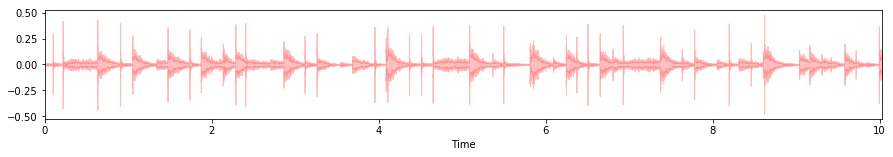

In [5]:
pre_emphasis = 0.97
y = np.append(y[0], y[1:] - pre_emphasis * y[:-1])
plt.figure(figsize=(15,2))
librosa.display.waveplot(y  = y,
                     sr     = sr, 
                     max_sr = 1000, 
                     alpha  = 0.25, 
                     color  = 'red')

### Fourier Transform

Figure 1 - Linear Amplitudes (color map)

FT Shape (1025, 433)


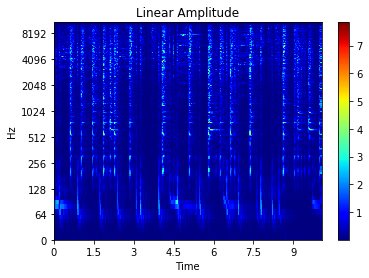

In [6]:
D = librosa.stft(y, n_fft = 2048, hop_length = 512)
print('FT Shape', D.shape)

# Y-axis can be linear or log or mel
librosa.display.specshow(np.abs(D), x_axis='time', y_axis='log', cmap=cm.jet,) # Take magnitude of complex number
plt.colorbar()
plt.title('Linear Amplitude')

Figure 2 - Log Amplitude

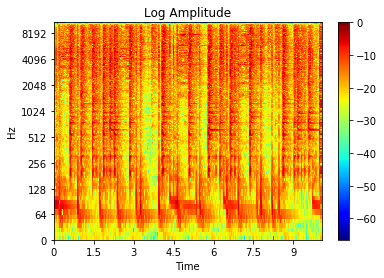

In [7]:
log_amplitude = librosa.logamplitude(D, ref=np.max)
librosa.display.specshow(log_amplitude, x_axis='time', y_axis='log', cmap=cm.jet,)
plt.colorbar()
plt.title('Log Amplitude')

Figure 3 -Log Power (Log power spectrogram seems to be the most informative among the three)

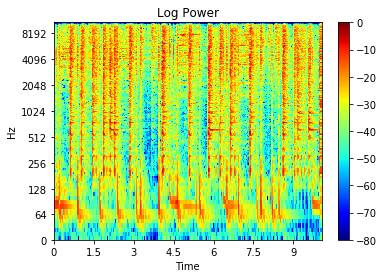

In [8]:
log_amplitude = librosa.logamplitude(D**2, ref=np.max) # Square amplitude and then take log
librosa.display.specshow(log_amplitude, x_axis='time', y_axis='log', cmap=cm.jet,)
plt.colorbar()
plt.title('Log Power')

### CQT Transform

Transform shape (84, 433)


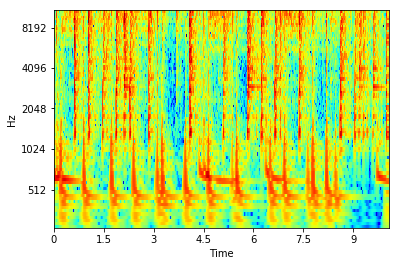

In [9]:
C = librosa.cqt(y, sr=sr, n_bins=84)
print('Transform shape', C.shape) 
log_power = librosa.logamplitude(C**2, ref=np.max)
librosa.display.specshow(log_power, x_axis='time', y_axis='mel', cmap=cm.jet)

### MEL Spectrogram

MEL scale is linear at lower frequency and logarithmic at higher frequency. - more like human hearing perception

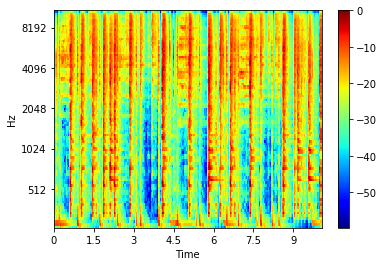

In [11]:
M = librosa.feature.melspectrogram(y, sr, fmax = sr/2, n_fft=2048, hop_length=512, 
                                   n_mels = 96, power = 2) # Power = 2 refers to squared amplitude 
                                                           # Hanning window by default
log_power = librosa.power_to_db(M, ref=np.max)# Covert to dB (log) scale
librosa.display.specshow(log_power, x_axis='time', y_axis='mel', cmap=cm.jet)
plt.colorbar()

To save and load image

In [12]:
pylab.figure(figsize=(3,3))
pylab.axis('off') 
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
librosa.display.specshow(log_power, cmap=cm.jet)
pylab.savefig('test.jpg', bbox_inches=None, pad_inches=0)
pylab.close()

In [13]:
im = Image.open("test.jpg", )
np.asarray(im).shape

(216, 216, 3)

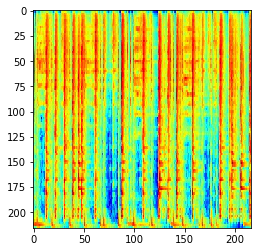

In [14]:
imshow(np.asarray(im))

In [15]:
import os
import librosa
from librosa import display
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
import pylab

In [9]:
WAV_DIR = 'wav_files/'
IMG_DIR = 'spectrogram_images/'
wav_files = os.listdir(WAV_DIR)

In [10]:
for f in wav_files[:10]:
    try:
        # Read wav-file
        y, sr = librosa.load(WAV_DIR+f, sr = 22050) # Use the default sampling rate of 22,050 Hz
        
        # Compute spectrogram
        M = librosa.feature.melspectrogram(y, sr, 
                                           fmax = sr/2, # Maximum frequency to be used on the on the MEL scale
                                           n_fft=2048, 
                                           hop_length=512, 
                                           n_mels = 96, # Set as per the Google Large-scale audio CNN paper
                                           power = 2) # Power = 2 refers to squared amplitude
        
        # Power in DB
        log_power = librosa.power_to_db(M, ref=np.max)# Covert to dB (log) scale
        
        # Plotting the spectrogram
        pylab.figure(figsize=(5,5))
        pylab.axis('off') 
        pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
        librosa.display.specshow(log_power, cmap=cm.jet)
        pylab.savefig(IMG_DIR + f[:-4]+'.jpg', bbox_inches=None, pad_inches=0)
        pylab.close()

    except Exception as e:
        print(f, e)
        pass